<a href="https://colab.research.google.com/github/sameerhimati/Apples/blob/main/ExploreApples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
%matplotlib inline
sns.set(color_codes=True)

In [47]:
# from google.colab import files
# uploaded = files.upload()

# import io
# df_original = pd.read_csv('apple_quality.csv')

In [68]:
df_original = pd.read_csv('../data/raw/apple_quality.csv')

In [69]:
df_original.head()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good


In [70]:
df_original.dtypes

A_id           float64
Size           float64
Weight         float64
Sweetness      float64
Crunchiness    float64
Juiciness      float64
Ripeness       float64
Acidity         object
Quality         object
dtype: object

In [71]:
df_original.tail()


,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
3996,3996.0,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235285,good
3997,3997.0,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611391,bad
3998,3998.0,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229719806,good
3999,3999.0,0.278540,-1.715505,0.121217,-1.154075,1.266677,-0.776571,1.599796456,good
4000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Created_by_Nidula_Elgiriyewithana,NaN


In [72]:
df = df_original.drop([4000])
df = df.set_index('A_id')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4000 entries, 0.0 to 3999.0
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Size         4000 non-null   float64
 1   Weight       4000 non-null   float64
 2   Sweetness    4000 non-null   float64
 3   Crunchiness  4000 non-null   float64
 4   Juiciness    4000 non-null   float64
 5   Ripeness     4000 non-null   float64
 6   Acidity      4000 non-null   object 
 7   Quality      4000 non-null   object 
dtypes: float64(6), object(2)
memory usage: 281.2+ KB


In [73]:
df.describe()

#hmm why is Acidity an object? Lets look


,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,-0.503015,-0.989547,-0.470479,0.985478,0.512118,0.498277
std,1.928059,1.602507,1.943441,1.402757,1.930286,1.874427
min,-7.151703,-7.149848,-6.894485,-6.055058,-5.961897,-5.864599
25%,-1.816765,-2.011770,-1.738425,0.062764,-0.801286,-0.771677
50%,-0.513703,-0.984736,-0.504758,0.998249,0.534219,0.503445
75%,0.805526,0.030976,0.801922,1.894234,1.835976,1.766212
max,6.406367,5.790714,6.374916,7.619852,7.364403,7.237837


In [74]:
df.describe(include=["object"]) # hmm lets look more at Acidity

,Acidity,Quality
count,4000,4000
unique,4000,2
top,-0.491590483,good
freq,1,2004


In [75]:
df["Acidity"].value_counts(normalize=True) # okay so maybe they were just set as strings

Acidity
-0.491590483    0.00025
1.006877454     0.00025
-0.132407603    0.00025
1.223084441     0.00025
2.190636353     0.00025
                 ...   
-3.873112715    0.00025
-0.08899782     0.00025
-0.3815496      0.00025
4.67363368      0.00025
1.599796456     0.00025
Name: proportion, Length: 4000, dtype: float64

In [76]:
df["Acidity"] = df.Acidity.astype(float) # make it a float

In [77]:
df.describe() # now call describe

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,-0.503015,-0.989547,-0.470479,0.985478,0.512118,0.498277,0.076877
std,1.928059,1.602507,1.943441,1.402757,1.930286,1.874427,2.110270
min,-7.151703,-7.149848,-6.894485,-6.055058,-5.961897,-5.864599,-7.010538
25%,-1.816765,-2.011770,-1.738425,0.062764,-0.801286,-0.771677,-1.377424
50%,-0.513703,-0.984736,-0.504758,0.998249,0.534219,0.503445,0.022609
75%,0.805526,0.030976,0.801922,1.894234,1.835976,1.766212,1.510493
max,6.406367,5.790714,6.374916,7.619852,7.364403,7.237837,7.404736


In [99]:
# Lets make the 'good' and 'bad' columns 0 & 1 with 1 = good and 0 = bad

df.Quality = df.Quality.replace(to_replace=['good', 'bad'], value=[1, 0])
df['Quality']=df['Quality'].astype(float)

In [79]:
# Perfect, now lets continue and check what out values look like when apples are good vs bad

df[df["Quality"] == 1].describe()

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
count,2004.000000,2004.000000,2004.000000,2004.000000,2004.000000,2004.000000,2004.000000,2004.0
mean,-0.033553,-0.987274,0.016287,0.968154,1.013356,0.003890,0.060668,1.0
std,1.972189,1.852145,1.910178,1.599191,1.689522,1.729708,2.006745,0.0
min,-6.905803,-7.149848,-5.118948,-6.055058,-5.261636,-5.313838,-7.010538,1.0
25%,-1.379540,-2.220975,-1.281629,-0.126736,-0.108738,-1.194310,-1.332003,1.0
50%,0.025554,-0.994428,-0.116781,1.049431,1.024190,0.095571,0.060766,1.0
75%,1.344088,0.291035,1.236140,2.044560,2.148908,1.176599,1.454957,1.0
max,6.406367,5.790714,6.374916,7.619852,7.364403,5.553256,7.193374,1.0


In [81]:
# and now bad

df[df["Quality"] == 0].describe()

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
count,1996.000000,1996.000000,1996.000000,1996.000000,1996.000000,1996.000000,1996.000000,1996.0
mean,-0.974358,-0.991828,-0.959195,1.002871,0.008871,0.994646,0.093151,0.0
std,1.761477,1.305158,1.852182,1.173057,2.024136,1.883318,2.209720,0.0
min,-7.151703,-5.746384,-6.894485,-2.620954,-5.961897,-5.864599,-6.955460,0.0
25%,-2.169909,-1.837784,-2.194897,0.249392,-1.374461,-0.231485,-1.427181,0.0
50%,-1.019633,-0.975703,-0.921758,0.977615,0.005241,0.965054,-0.010607,0.0
75%,0.221546,-0.148292,0.312889,1.751937,1.432981,2.277946,1.595519,0.0
max,4.649923,3.081538,5.559624,6.297873,6.328304,7.237837,7.404736,0.0


In [82]:
df.tail()

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
A_id,,,,,,,,
3995.0,0.059386,-1.067408,-3.714549,0.473052,1.697986,2.244055,0.137784,0
3996.0,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235,1
3997.0,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611,0
3998.0,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229720,1
3999.0,0.278540,-1.715505,0.121217,-1.154075,1.266677,-0.776571,1.599796,1


In [83]:
df.count() # check for duplicates

# df = df.drop_duplicates()

Size           4000
Weight         4000
Sweetness      4000
Crunchiness    4000
Juiciness      4000
Ripeness       4000
Acidity        4000
Quality        4000
dtype: int64

In [84]:
print(df.isnull().sum()) #check for nulls, drop if nessassary

Size           0
Weight         0
Sweetness      0
Crunchiness    0
Juiciness      0
Ripeness       0
Acidity        0
Quality        0
dtype: int64


In [85]:
df = df.dropna()    # Dropping the missing values.
df.count()

Size           4000
Weight         4000
Sweetness      4000
Crunchiness    4000
Juiciness      4000
Ripeness       4000
Acidity        4000
Quality        4000
dtype: int64

In [86]:
# For out exploration we need one version of the DF without the quality column

df1 = df.loc[:, df.columns != 'Quality']

<Axes: xlabel='Acidity'>

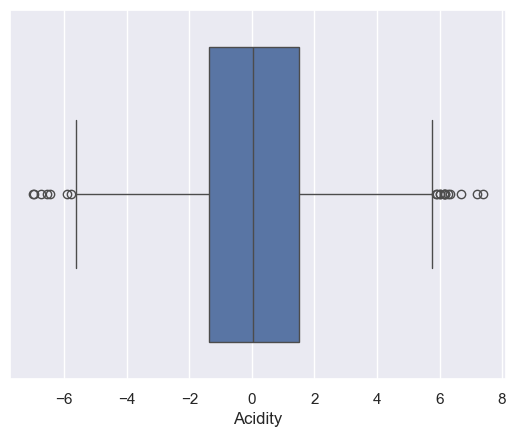

In [87]:
sns.boxplot(x=df['Acidity'])

<Axes: xlabel='Size'>

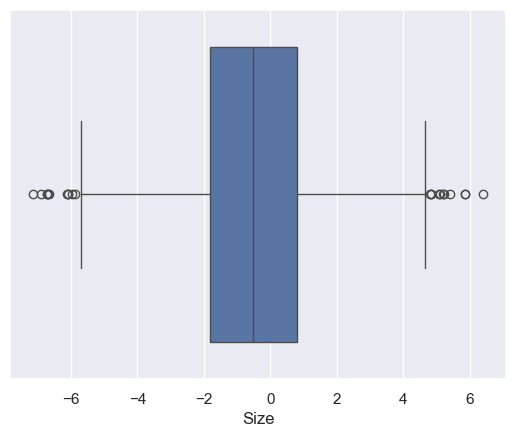

In [88]:
sns.boxplot(x=df['Size'])

<Axes: xlabel='Weight'>

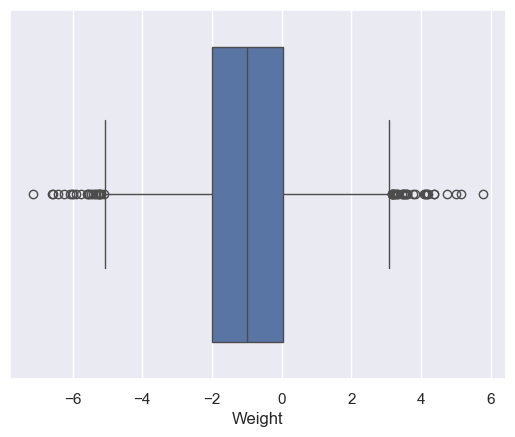

In [89]:
sns.boxplot(x=df['Weight'])

<Axes: xlabel='Sweetness'>

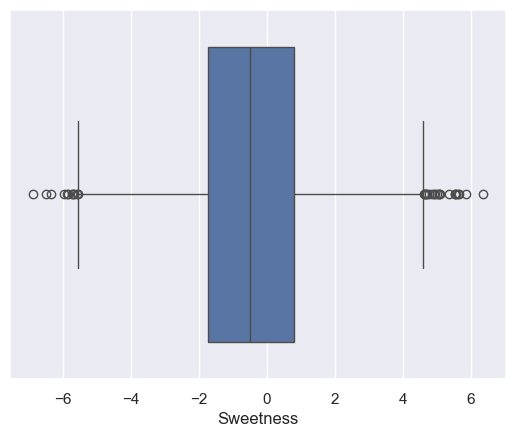

In [90]:
sns.boxplot(x=df['Sweetness'])

<Axes: >

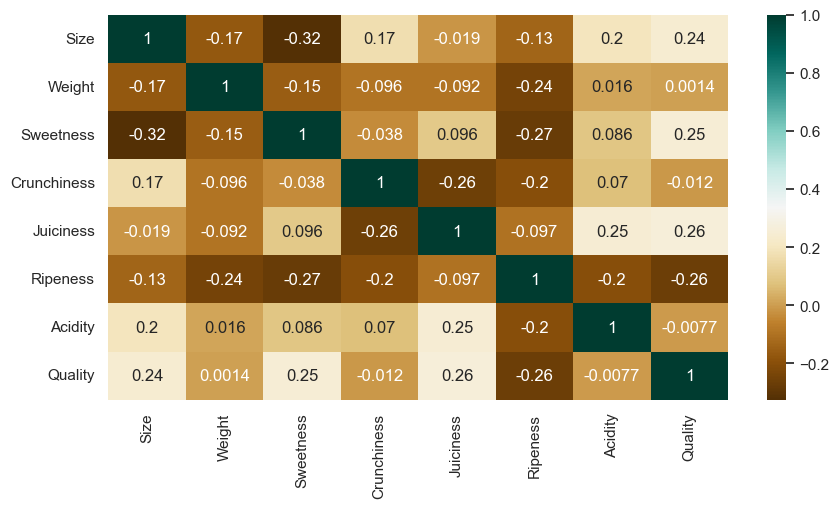

In [92]:
plt.figure(figsize=(10,5))
c=df.corr()
sns.heatmap(c,cmap="BrBG",annot=True)


In [93]:
c

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
Size,1.000000,-0.170702,-0.324680,0.169868,-0.018892,-0.134773,0.196218,0.244007
Weight,-0.170702,1.000000,-0.154246,-0.095882,-0.092263,-0.243824,0.016414,0.001421
Sweetness,-0.324680,-0.154246,1.000000,-0.037552,0.095882,-0.273800,0.085999,0.250998
Crunchiness,0.169868,-0.095882,-0.037552,1.000000,-0.259607,-0.201982,0.069943,-0.012376
Juiciness,-0.018892,-0.092263,0.095882,-0.259607,1.000000,-0.097144,0.248714,0.260223
Ripeness,-0.134773,-0.243824,-0.273800,-0.201982,-0.097144,1.000000,-0.202669,-0.264315
Acidity,0.196218,0.016414,0.085999,0.069943,0.248714,-0.202669,1.000000,-0.007697
Quality,0.244007,0.001421,0.250998,-0.012376,0.260223,-0.264315,-0.007697,1.000000


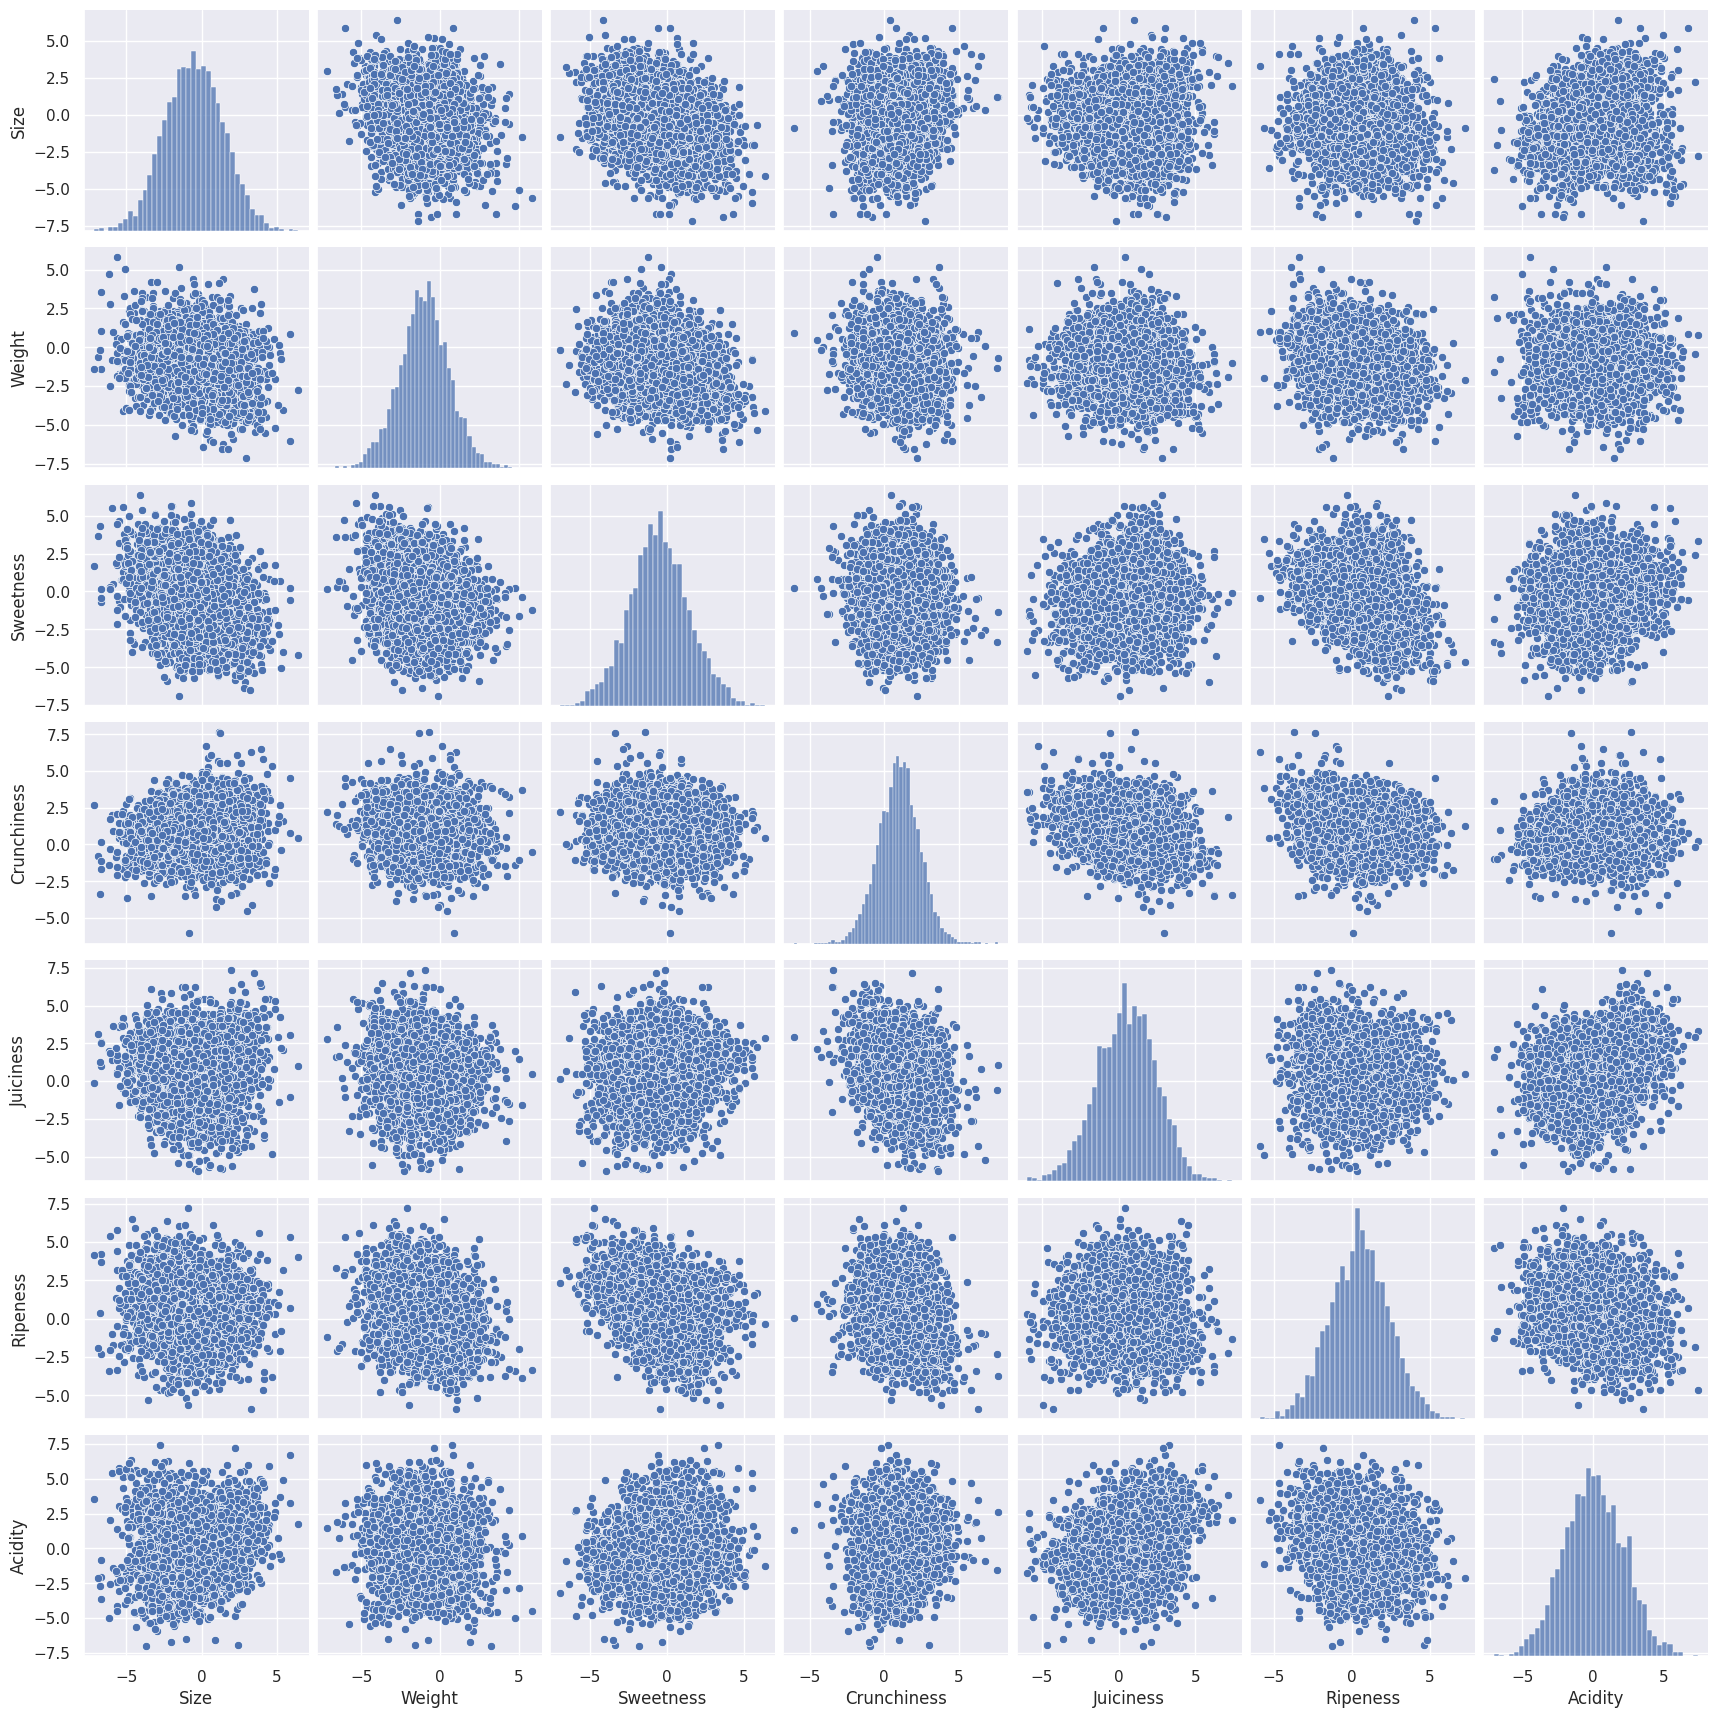

In [ ]:
sns.pairplot(df)

In [94]:
# hmm not a lot of correlation there
# lets see if we can find the IQR - Good way to get outliers

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Size           2.622291
Weight         2.042747
Sweetness      2.540347
Crunchiness    1.831470
Juiciness      2.637262
Ripeness       2.537889
Acidity        2.887917
Quality        1.000000
dtype: float64


In [95]:
z = np.abs(stats.zscore(df.loc[:, df.columns != 'Quality'])) # Z scores is another way of finding outlier. This takes all columns except Quality
print(z) # Note we called df.loc[:, df.columns != 'Quality'] instead of df1 since we dont want to remove the quality column

            Size    Weight  Sweetness  Crunchiness  Juiciness  Ripeness  \
A_id                                                                      
0.0     1.798424  0.950373   2.993421     1.424150   0.690545  0.089872   
1.0     0.359060  1.154404   2.127698     0.429746   0.176767  0.197020   
2.0     0.109445  0.225759   0.652507     0.946892   1.205422  0.286156   
3.0     0.079977  0.800146   0.923916     0.772399   1.619575  2.087320   
4.0     0.968573  0.191640   0.044164     1.096894   1.305025  0.961548   
...          ...       ...        ...          ...        ...       ...   
3995.0  0.291729  0.048594   1.669449     0.365345   0.614425  0.931482   
3996.0  0.108878  1.834105   0.137124     1.159058   0.252634  0.846326   
3997.0  1.105655  0.716904   1.013784     0.234036   0.874379  2.275957   
3998.0  1.818112  0.492908   1.459901     0.845446   0.854549  0.151419   
3999.0  0.405409  0.453071   0.304496     1.525439   0.390954  0.680212   

         Acidity  
A_id 

In [28]:
threshold = 3
print(np.where(z > 3)) # These are outliers


(array([  20,   21,   65,   71,   76,   83,  161,  161,  227,  244,  247,
        276,  337,  526,  543,  561,  634,  634,  663,  672,  676,  786,
        794,  895, 1049, 1110, 1212, 1283, 1381, 1386, 1446, 1463, 1480,
       1511, 1516, 1523, 1603, 1655, 1749, 1919, 1931, 1973, 2001, 2002,
       2017, 2038, 2045, 2106, 2196, 2198, 2219, 2232, 2288, 2331, 2458,
       2458, 2468, 2470, 2474, 2502, 2510, 2602, 2662, 2676, 2691, 2753,
       2784, 2785, 2812, 2831, 2832, 2854, 2885, 2908, 2955, 2988, 3009,
       3010, 3017, 3066, 3080, 3164, 3177, 3209, 3229, 3280, 3284, 3297,
       3494, 3559, 3614, 3761, 3789, 3874, 3874, 3880, 3885, 3923, 3955,
       3957, 3973, 3973]), array([5, 3, 5, 3, 3, 1, 3, 5, 6, 6, 1, 1, 5, 1, 2, 1, 0, 6, 4, 1, 4, 3,
       3, 1, 4, 2, 2, 3, 0, 1, 1, 3, 3, 3, 0, 1, 3, 5, 2, 2, 6, 6, 0, 0,
       5, 4, 1, 1, 6, 5, 2, 4, 4, 0, 0, 3, 3, 6, 4, 5, 3, 1, 4, 0, 2, 4,
       4, 1, 3, 3, 2, 3, 3, 2, 1, 4, 4, 4, 4, 6, 1, 3, 1, 3, 3, 3, 3, 3,
       3, 0, 1, 1, 2, 3

In [96]:
df1 = df[(z < 3).all(axis=1)] # removing said outliers that are past the threshold

In [97]:
df1.shape

(3903, 8)

In [98]:
df.shape

(4000, 8)

Now that we are done exploring and cleaning, we can do some real AI SHIT! Lets start with perhaps trying a classification NN